# Imports

In [2]:
import glob
import os

import pandas as pd
import scanpy as sc
import seaborn as sns

## Def describe

In [3]:
def describe(df, random=False):
    print(df.shape)
    print("--- First 5 entries ---")
    display(df.head())
    if random:
        print('--- Random subset ---')
        display(df.sample(5))

## Figure folder

In [4]:
figure_folder = '/home/olga/googledrive/kmer-homology-paper/figures/unaligned_kmers/'
! mkdir -p $figure_folder

## Read one2one h5ad

In [5]:
adata = sc.read(
    "/home/olga/data_sm/immune-evolution/h5ads/human-lemur-mouse-bat/human-lemur-mouse-bat__lung_only.h5ad"
)
adata.obs = adata.obs.reset_index().set_index('cell_id')
print(adata)
adata.obs.head()

AnnData object with n_obs × n_vars = 126745 × 10560
    obs: 'index', 'age', 'cell_barcode', 'cell_ontology_class', 'cell_ontology_id', 'channel', 'free_annotation', 'individual', 'sample', 'sequencing_run', 'sex', 'species', 'species_batch', 'species_latin', 'tissue', 'narrow_group', 'broad_group', 'compartment_group', 'compartment_narrow', 'channel_cleaned', 'batch', 'n_genes', 'n_counts', 'species_batch_v2', 'compartment_broad', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'common_individual_id'
    var: 'bat__gene_name', 'mouse_lemur__gene_name-bat', 'mouse__gene_name-bat', 'mouse_lemur__gene_name_x-hlm', 'mouse__gene_name_x-hlm', 'gene_ids-lemur-hlm', 'n_cells-mouse-hlm', 'mouse_lemur__gene_name_y-hlm', 'mouse__gene_name_y-hlm'


,index,age,cell_barcode,cell_ontology_class,cell_ontology_id,channel,free_annotation,individual,sample,sequencing_run,...,channel_cleaned,batch,n_genes,n_counts,species_batch_v2,compartment_broad,compartment_broad_narrow,compartment_species,compartment_narrow_species,common_individual_id
cell_id,,,,,,,,,,,,,,,,,,,,,
P2_1__AAACCTGAGAAACCAT,P2_1_AAACCTGAGAAACCAT-human-hlm,46y,AAACCTGAGAAACCAT,capillary endothelial cell,nan,P2_1,Capillary Aerocyte,patient_2,distal 2,180607_A00111_0155_BHFCWYDMXX,...,P2_1,NaN,NaN,NaN,hlm,endothelial: Capillary,endothelial: Capillary: Capillary Aerocyte,endothelial: human,endothelial: Capillary Aerocyte: human,human_patient_2
P2_1__AAATGCCAGATGAGAG,P2_1_AAATGCCAGATGAGAG-human-hlm,46y,AAATGCCAGATGAGAG,capillary endothelial cell,nan,P2_1,Capillary Aerocyte,patient_2,distal 2,180607_A00111_0155_BHFCWYDMXX,...,P2_1,NaN,NaN,NaN,hlm,endothelial: Capillary,endothelial: Capillary: Capillary Aerocyte,endothelial: human,endothelial: Capillary Aerocyte: human,human_patient_2
P2_1__AACACGTTCGATCCCT,P2_1_AACACGTTCGATCCCT-human-hlm,46y,AACACGTTCGATCCCT,capillary endothelial cell,nan,P2_1,Capillary Aerocyte,patient_2,distal 2,180607_A00111_0155_BHFCWYDMXX,...,P2_1,NaN,NaN,NaN,hlm,endothelial: Capillary,endothelial: Capillary: Capillary Aerocyte,endothelial: human,endothelial: Capillary Aerocyte: human,human_patient_2
P2_1__AACACGTTCGCACTCT,P2_1_AACACGTTCGCACTCT-human-hlm,46y,AACACGTTCGCACTCT,capillary endothelial cell,nan,P2_1,Capillary Aerocyte,patient_2,distal 2,180607_A00111_0155_BHFCWYDMXX,...,P2_1,NaN,NaN,NaN,hlm,endothelial: Capillary,endothelial: Capillary: Capillary Aerocyte,endothelial: human,endothelial: Capillary Aerocyte: human,human_patient_2
P2_1__AACCATGCAGCTCGCA,P2_1_AACCATGCAGCTCGCA-human-hlm,46y,AACCATGCAGCTCGCA,capillary endothelial cell,nan,P2_1,Capillary Aerocyte,patient_2,distal 2,180607_A00111_0155_BHFCWYDMXX,...,P2_1,NaN,NaN,NaN,hlm,endothelial: Capillary,endothelial: Capillary: Capillary Aerocyte,endothelial: human,endothelial: Capillary Aerocyte: human,human_patient_2


# Read parquet files

## File paths

In [6]:
sketch_id = 'alphabet-dayhoff__ksize-51__scaled-10'
sig_outdir_base = "/home/olga/data_sm/immune-evolution/kmer-signatures"


parquets = glob.glob(f'/home/olga/data_sm/immune-evolution/kmer-signatures/*/2--single-cell-kmers/{sketch_id}/hash2kmer__unique_kmers_per_celltype.parquet')
parquets

['/home/olga/data_sm/immune-evolution/kmer-signatures/2--test-human/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet',
 '/home/olga/data_sm/immune-evolution/kmer-signatures/3--test-bat/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet',
 '/home/olga/data_sm/immune-evolution/kmer-signatures/4--test-lemur/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet',
 '/home/olga/data_sm/immune-evolution/kmer-signatures/1--train-mouse/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet']

### Bat

In [8]:
bat = pd.read_parquet('/home/olga/data_sm/immune-evolution/kmer-signatures/3--test-bat/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet')
describe(bat)

(69988437, 13)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,broad_group
0,PRPGRPPPAATVWFLSI,bdbbdbbbbbbeffebe,459880203121538048,E00512:367:HWHJNCCXY:1:2217:9516:30175\tCB:Z:A...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
1,IPTDPAPKAHPGPRRAN,ebbcbbbdbdbbbddbc,210410082269031083,E00512:367:HWHJNCCXY:1:2209:30289:70381\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
2,FGAGSVGIAAGAGTIIH,fbbbbebebbbbbbeed,1384284221265406607,E00512:367:HWHJNCCXY:1:2209:30289:70381\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
3,VGIAAGAGTIIHDKHRS,ebebbbbbbeedcdddb,446503280445862484,E00512:367:HWHJNCCXY:1:2209:30289:70381\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
4,SGQGLWVLLQELGPLSM,bbcbefeeeccebbebe,697450965653291028,E00512:367:HWHJNCCXY:1:2209:30289:70381\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast


### Human

In [9]:
human = pd.read_parquet('/home/olga/data_sm/immune-evolution/kmer-signatures/2--test-human/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet')
describe(human)

(33366578, 13)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,broad_group
0,DLNVKPKTIKTLEENLG,cecedbdbedbeccceb,550348301278027135,A00111:155:HFCWYDMXX:1:1359:1190:25066\tCB:Z:G...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
1,IKTLEENLGITIQDIGV,edbecccebebeccebe,974148631326387115,A00111:155:HFCWYDMXX:1:1359:1190:25066\tCB:Z:G...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
3,CRKLKLDPFLTPYTKIN,addedecbfebbfbdec,1662986983738689810,A00111:155:HFCWYDMXX:2:1129:25961:14544\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
4,RKLKLDPFLTPYTKINS,ddedecbfebbfbdecb,799720167227311772,A00111:155:HFCWYDMXX:2:1129:25961:14544\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
7,LDPFLTPYTKINSRWIK,ecbfebbfbdecbdfed,537198855570371996,A00111:155:HFCWYDMXX:2:1360:14886:30185\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast


In [71]:
bat.groupby('broad_group').cell_id.nunique()

broad_group
Alveolar Epithelial Type 2          832
B cell                              165
Capillary                          2214
Dendritic                            98
Fibroblast                         1382
Macrophage                         1196
Monocyte                            969
Natural Killer T cell               351
Smooth Muscle and Myofibroblast     120
T cell                              376
Name: cell_id, dtype: int64

In [72]:
human.groupby('broad_group').cell_id.nunique()

broad_group
Alveolar Epithelial Type 2         3150
B cell                              174
Capillary                          2093
Dendritic                           438
Fibroblast                          725
Macrophage                         3356
Monocyte                            752
Natural Killer T cell               224
Smooth Muscle and Myofibroblast     587
T cell                             2655
Name: cell_id, dtype: int64

In [10]:
bat.groupby('broad_group').apply(lambda x: x.hashval.nunique()/x.cell_id.nunique())

broad_group
Alveolar Epithelial Type 2         3511.283654
B cell                             2674.539394
Capillary                          1390.377597
Dendritic                          6382.326531
Fibroblast                         1567.082489
Macrophage                         1992.954013
Monocyte                           2309.285862
Natural Killer T cell              2838.341880
Smooth Muscle and Myofibroblast    4045.616667
T cell                             2232.808511
dtype: float64

In [11]:
bat_unaligned = bat.query('alignment_status == "unaligned"')
bat_unaligned.head()

,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,broad_group
0,PRPGRPPPAATVWFLSI,bdbbdbbbbbbeffebe,459880203121538048,E00512:367:HWHJNCCXY:1:2217:9516:30175\tCB:Z:A...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
1,IPTDPAPKAHPGPRRAN,ebbcbbbdbdbbbddbc,210410082269031083,E00512:367:HWHJNCCXY:1:2209:30289:70381\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
2,FGAGSVGIAAGAGTIIH,fbbbbebebbbbbbeed,1384284221265406607,E00512:367:HWHJNCCXY:1:2209:30289:70381\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
3,VGIAAGAGTIIHDKHRS,ebebbbbbbeedcdddb,446503280445862484,E00512:367:HWHJNCCXY:1:2209:30289:70381\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
4,SGQGLWVLLQELGPLSM,bbcbefeeeccebbebe,697450965653291028,E00512:367:HWHJNCCXY:1:2209:30289:70381\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast


In [12]:
bat_aligned = bat.query('alignment_status == "aligned"')
describe(bat_aligned)

(66637862, 13)
--- First 5 entries ---


,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,broad_group
0,LGVWLTYRYRNQKDPLS,ebefebfdfdccdcbeb,1071395202532925770,E00512:367:HWHJNCCXY:1:1205:4229:18766\tCB:Z:A...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Fibroblast
1,GNLVVESPRSNQLSHLG,bceeecbbdbccebdeb,964549883818904234,E00512:367:HWHJNCCXY:1:1120:29954:49197\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Fibroblast
2,SNQLSHLGGSSAQGAIF,bccebdebbbbbcbbef,1434265734909814491,E00512:367:HWHJNCCXY:1:1120:29954:49197\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Fibroblast
3,NQLSHLGGSSAQGAIFN,ccebdebbbbbcbbefc,141337536592772060,E00512:367:HWHJNCCXY:1:1120:29954:49197\tCB:Z:...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Fibroblast
7,DLQQVAGSAARSQDALS,ceccebbbbbdbccbeb,1389938289591061387,E00512:367:HWHJNCCXY:1:1101:8623:34711\tCB:Z:A...,None,bat,bat3-LU__AGTGAGGCAGGATCGA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,Fibroblast


In [ ]:
bat_aligned.dtypes

In [ ]:
1+1

In [13]:
bat_hashval_to_ncells = bat_aligned.groupby(['hashval', 'broad_group']).cell_id.nunique()
bat_hashval_to_ncells.name = 'n_cells_bat'
bat_hashval_to_ncells.head()

hashval              broad_group               
1000000127429088155  Alveolar Epithelial Type 2    0
                     B cell                        0
                     Capillary                     1
                     Dendritic                     0
                     Fibroblast                    0
Name: n_cells_bat, dtype: int64

In [15]:
bat_unaligned_hashes = set(bat_unaligned.hashval)
len(bat_unaligned_hashes)

1480071

In [ ]:
%%time

human_hashvals_bat_unaligned = human.query(
    "hashval in @bat_unaligned_hashes"
)
describe(human_hashvals_bat_unaligned)

/home/olga/miniconda3/envs/immune-evolution/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
human_hashvals_bat_unaligned_gene_names = human_hashvals_bat_unaligned.groupby('broad_group').gene_name.value_counts()
human_hashvals_bat_unaligned_gene_names.name = 'n_hashes'
human_hashvals_bat_unaligned_gene_names = human_hashvals_bat_unaligned_gene_names.reset_index()
describe(human_hashvals_bat_unaligned_gene_names)

### Read bat unannotated genes

In [ ]:
bat_unannotated = pd.read_csv('/home/olga/data_sm/immune-evolution/databases/unannotated-genes-in-bat-compared-to-human-GRCh38/unannotated_gene_in_bat_compared_to_GRCH38p13.csv')
bat_unannotated = bat_unannotated.dropna(how='all', axis=1)
bat_unannotated = {k: v for k, v in bat_unannotated.iteritems()}
# print(bat_unannotated.shape)
# bat_unannotated.head()
bat_unannotated.keys()

In [ ]:
dfs = []

for gene_category, gene_names in bat_unannotated.items():
#     print(f'--- {gene_category} ---')
    df = human_hashvals_bat_unaligned_gene_names.query('gene_name in @gene_names')
    df['gene_category'] = gene_category
    dfs.append(df)
bat_unaligned_in_human = pd.concat(dfs)
describe(bat_unaligned_in_human)


In [ ]:
bat_unaligned_in_human.to_csv(
    os.path.join(figure_folder, "bat_unaligned_in_human.csv"), index=False
)

In [ ]:
bat_unaligned_in_human.query('gene_category == "ISG" and broad_group == "Alveolar Epithelial Type 2"')

In [133]:
bat_unaligned_in_human_n_genes = bat_unaligned_in_human.groupby(['gene_category', 'broad_group']).size()
bat_unaligned_in_human_n_genes.name = 'n_genes'
bat_unaligned_in_human_n_genes = bat_unaligned_in_human_n_genes.reset_index()
bat_unaligned_in_human_n_genes = bat_unaligned_in_human_n_genes.sort_values(['gene_category', 'n_genes'], ascending=False)
bat_unaligned_in_human_n_genes

,gene_category,broad_group,n_genes
35,unannotated_all,Macrophage,341
30,unannotated_all,Alveolar Epithelial Type 2,286
39,unannotated_all,T cell,251
34,unannotated_all,Fibroblast,243
32,unannotated_all,Capillary,240
38,unannotated_all,Smooth Muscle and Myofibroblast,222
33,unannotated_all,Dendritic,214
36,unannotated_all,Monocyte,200
31,unannotated_all,B cell,139
37,unannotated_all,Natural Killer T cell,108


### Write unannotated genes to csv

### Plot number of unannoted genes per category

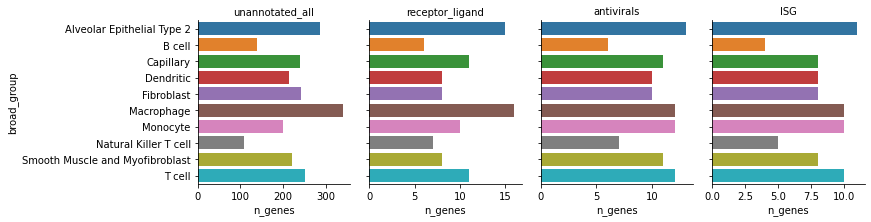

In [136]:
g = sns.catplot(
    y="broad_group",
    x="n_genes",
    col="gene_category",
    sharex=False,
    data=bat_unaligned_in_human_n_genes,
    kind='bar',
    height=3,
#     sharey=False,
)
g.set_titles("{col_name}")

### one plot per category

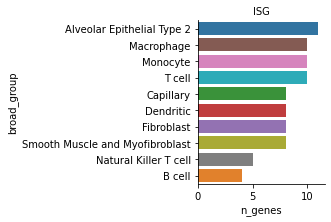

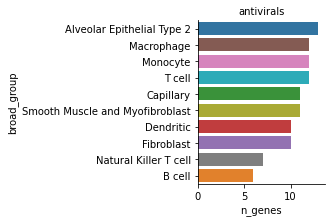

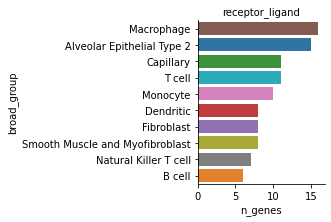

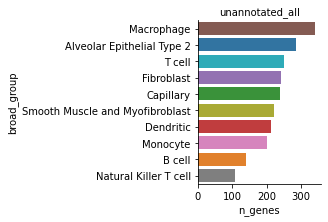

In [162]:
celltype_palette = dict(
    zip(
        sorted(bat_unaligned_in_human_n_genes.broad_group.unique()),
        sns.color_palette("tab10", n_colors=10),
    ),
)

for gene_group, df in bat_unaligned_in_human_n_genes.groupby("gene_category"):
    df = df.sort_values("n_genes", ascending=False)
    g = sns.catplot(
        y="broad_group",
        x="n_genes",
        col="gene_category",
        sharex=False,
        data=df,
        order=df.broad_group,
        palette=celltype_palette,
        kind="bar",
        height=3,
        aspect=1.5,
        #     sharey=False,
    )
    g.set_titles("{col_name}")
    pdf = os.path.join(figure_folder, f'barplot__unannotated_genes_found_in_unaligned_kmers__{gene_group}.pdf')
    g.savefig(pdf)
    png = pdf.replace('.pdf', '.png')
    g.savefig(png)

In [ ]:
bat_hashval_to_ncells

In [190]:
bat_unaligned_in_human.head()

,broad_group,gene_name,n_hashes,gene_category
142,Alveolar Epithelial Type 2,GBP1,10,ISG
403,Alveolar Epithelial Type 2,CAPN2,6,ISG
910,Alveolar Epithelial Type 2,PARP14,4,ISG
1113,Alveolar Epithelial Type 2,CASP4,3,ISG
1236,Alveolar Epithelial Type 2,GBP2,3,ISG


In [191]:
human_celltype_unique_hashvals_bat_unaligned.head()

,kmer_in_sequence,kmer_in_alphabet,hashval,read_name,gene_name,species,cell_id,sketch_id,moltype,ksize,scaled,alignment_status,broad_group
20,DTYTLPRLNQEEVESLN,cbfbebdeccccecbec,1361709410904674137,A00111:155:HFCWYDMXX:1:2227:29803:12649\tCB:Z:...,None,human,P3_4__GAGCAGAAGTGGACGT,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Fibroblast
3,SDPLELVVSGAAETLSP,bcbeceeebbbbcbebb,444799571023784058,A00111:155:HFCWYDMXX:1:1483:10710:10864\tCB:Z:...,None,human,P3_2__CGAGAAGTCGTTGACA,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Monocyte
2,ISNFSKVSGYKINVQKS,ebcfbdebbfdececdb,859122113661270444,A00111:155:HFCWYDMXX:2:1410:28583:22091\tCB:Z:...,None,human,P3_4__CCCATACTCCACGCAG,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Alveolar Epithelial Type 2
3,NFSKVSGYKINVQKSQA,cfbdebbfdececdbcb,270327790717497491,A00111:155:HFCWYDMXX:2:1410:28583:22091\tCB:Z:...,None,human,P3_4__CCCATACTCCACGCAG,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Alveolar Epithelial Type 2
7,VTDQVEVNAQNSVPDEE,ebccececbccbebccc,393741197327423913,A00111:155:HFCWYDMXX:2:1221:25301:13401\tCB:Z:...,None,human,P3_4__TACGGATCATTGGCGC,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,unaligned,Smooth Muscle and Myofibroblast


In [195]:
bat_unaligned_in_human_with_hashvals = bat_unaligned_in_human.merge(
    human_celltype_unique_hashvals_bat_unaligned, on=["broad_group", "gene_name"]
)
bat_unaligned_in_human_with_hashvals = bat_unaligned_in_human_with_hashvals.merge(
    bat_with_celltypes_unaligned,
    on=[
        "broad_group",
        "kmer_in_sequence",
        "kmer_in_alphabet",
        "hashval",
        "sketch_id",
        'ksize',
        "moltype",
        "scaled",
    ], suffixes=('_human', '_bat')
)
# bat_unaligned_in_human_with_hashvals = bat_unaligned_in_human_with_hashvals.join(
#     bat_hashval_to_ncells, on=["hashval", "broad_group"]
# )
# bat_unaligned_in_human_with_hashvals = bat_unaligned_in_human_with_hashvals.drop(
#     ["read_name", "species", "cell_id", "alignment_status"], axis=1
# )
describe(bat_unaligned_in_human_with_hashvals)

(3170, 20)
--- First 5 entries ---


,broad_group,gene_name_human,n_hashes,gene_category,kmer_in_sequence,kmer_in_alphabet,hashval,read_name_human,species_human,cell_id_human,sketch_id,moltype,ksize,scaled,alignment_status_human,read_name_bat,gene_name_bat,species_bat,cell_id_bat,alignment_status_bat
0,Alveolar Epithelial Type 2,GBP1,10,ISG,YLMNKLAGKKKGFSLGS,feecdebbdddbfbebb,1018599205466499961,A00111:155:HFCWYDMXX:1:1233:14868:32189\tCB:Z:...,human,P3_6__GGCTGGTAGGGTGTTG,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,E00509:343:HWJ7HCCXY:7:1205:20151:11013\tCB:Z:...,None,bat,bat2-LU__TCATTACCACGTGAGA,unaligned
1,Alveolar Epithelial Type 2,GBP1,10,ISG,YLMNKLAGKKKGFSLGS,feecdebbdddbfbebb,1018599205466499961,A00111:155:HFCWYDMXX:1:1233:14868:32189\tCB:Z:...,human,P3_6__GGCTGGTAGGGTGTTG,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,E00509:343:HWJ7HCCXY:8:1121:11241:63824\tCB:Z:...,None,bat,bat2-LU__GTTTCTATCAGGCCCA,unaligned
2,Alveolar Epithelial Type 2,GBP1,10,ISG,YLMNKLAGKKKGFSLGS,feecdebbdddbfbebb,1018599205466499961,A00111:155:HFCWYDMXX:1:1233:14868:32189\tCB:Z:...,human,P3_6__GGCTGGTAGGGTGTTG,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,E00512:367:HWHJNCCXY:1:2115:3599:14406\tCB:Z:T...,None,bat,bat3-LU__TTGACTTAGGCAAAGA,unaligned
3,Alveolar Epithelial Type 2,GBP1,10,antivirals,YLMNKLAGKKKGFSLGS,feecdebbdddbfbebb,1018599205466499961,A00111:155:HFCWYDMXX:1:1233:14868:32189\tCB:Z:...,human,P3_6__GGCTGGTAGGGTGTTG,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,E00509:343:HWJ7HCCXY:7:1205:20151:11013\tCB:Z:...,None,bat,bat2-LU__TCATTACCACGTGAGA,unaligned
4,Alveolar Epithelial Type 2,GBP1,10,antivirals,YLMNKLAGKKKGFSLGS,feecdebbdddbfbebb,1018599205466499961,A00111:155:HFCWYDMXX:1:1233:14868:32189\tCB:Z:...,human,P3_6__GGCTGGTAGGGTGTTG,alphabet-dayhoff__ksize-51__scaled-10,dayhoff,51,10,aligned,E00509:343:HWJ7HCCXY:8:1121:11241:63824\tCB:Z:...,None,bat,bat2-LU__GTTTCTATCAGGCCCA,unaligned


In [222]:
n_cells_per_celltype_bat = bat_with_celltypes.groupby('broad_group').cell_id.nunique()
n_cells_per_celltype_bat.name = 'n_cells_bat_per_celltype'
n_cells_per_celltype_bat

broad_group
Alveolar Epithelial Type 2          832
B cell                              165
Capillary                          2214
Dendritic                            98
Fibroblast                         1382
Macrophage                         1196
Monocyte                            969
Natural Killer T cell               351
Smooth Muscle and Myofibroblast     120
T cell                              376
Name: n_cells_bat_per_celltype, dtype: int64

In [227]:
bat_unaligned_in_human_with_hashvals_n_cells_per_gene = (
    bat_unaligned_in_human_with_hashvals.groupby(
        ["broad_group", "gene_category", "gene_name_human"], observed=True
    ).cell_id_bat.nunique()
)
bat_unaligned_in_human_with_hashvals_n_cells_per_gene.name = "n_cells_bat"
bat_unaligned_in_human_with_hashvals_n_cells_per_gene = (
    bat_unaligned_in_human_with_hashvals_n_cells_per_gene.reset_index()
)
bat_unaligned_in_human_with_hashvals_n_cells_per_gene = (
    bat_unaligned_in_human_with_hashvals_n_cells_per_gene.sort_values(
        ["n_cells_bat"], ascending=False
    )
)
bat_unaligned_in_human_with_hashvals_n_cells_per_gene = (
    bat_unaligned_in_human_with_hashvals_n_cells_per_gene.sort_values(
        [
            "broad_group",
        ],
        ascending=True,
    )
)
bat_unaligned_in_human_with_hashvals_n_cells_per_gene = (
    bat_unaligned_in_human_with_hashvals_n_cells_per_gene.join(
        n_cells_per_celltype_bat, on="broad_group"
    )
)
bat_unaligned_in_human_with_hashvals_n_cells_per_gene[
    "bat_percent_cells_per_celltype"
] = 100 * bat_unaligned_in_human_with_hashvals_n_cells_per_gene.n_cells_bat.divide(
    bat_unaligned_in_human_with_hashvals_n_cells_per_gene.n_cells_bat_per_celltype
)
bat_unaligned_in_human_with_hashvals_n_cells_per_gene = (
    bat_unaligned_in_human_with_hashvals_n_cells_per_gene.sort_values(
        ["broad_group", "n_cells_bat"]
    )
)

,broad_group,gene_category,gene_name_human,n_cells_bat,n_cells_bat_per_celltype,bat_percent_cells_per_celltype
54,Alveolar Epithelial Type 2,unannotated_all,RPL17,2,832,0.240385
64,Alveolar Epithelial Type 2,unannotated_all,UBQLN2,5,832,0.600962
48,Alveolar Epithelial Type 2,unannotated_all,MMP23A,5,832,0.600962
6,Alveolar Epithelial Type 2,receptor_ligand,HLA-C,5,832,0.600962
60,Alveolar Epithelial Type 2,unannotated_all,TMEM14C,1,832,0.120192
...,...,...,...,...,...,...
317,T cell,unannotated_all,COX6B1,1,376,0.265957
319,T cell,unannotated_all,GBP4,2,376,0.531915
329,T cell,unannotated_all,PIP4K2A,2,376,0.531915
327,T cell,unannotated_all,PARP14,1,376,0.265957


In [228]:
bat_unaligned_in_human_with_hashvals_n_cells_per_gene.query('n_cells_bat > 20')

,broad_group,gene_category,gene_name_human,n_cells_bat,n_cells_bat_per_celltype,bat_percent_cells_per_celltype
22,Alveolar Epithelial Type 2,unannotated_all,CYP2D6,23,832,2.764423
55,Alveolar Epithelial Type 2,unannotated_all,RPS24,37,832,4.447115
120,Capillary,unannotated_all,TEAD4,161,2214,7.271906
175,Fibroblast,unannotated_all,MMP23A,48,1382,3.473227
264,Monocyte,receptor_ligand,HLA-DRB1,41,969,4.231166
280,Monocyte,unannotated_all,HLA-DRB1,41,969,4.231166
281,Monocyte,unannotated_all,HLA-DRB6,36,969,3.715170


### Write genes that are unaligned and the number of cells per celltype

In [230]:
bat_unaligned_in_human_with_hashvals_n_cells_per_gene.to_csv(
    os.path.join(figure_folder, "bat_unaligned_in_human__with_n_cells_expressing.csv"), index=False
)

In [229]:
bat_unaligned_in_human_with_hashvals_n_cells_per_gene.shape

(359, 6)

In [ ]:
bat_unaligned_in_human_with_hashvals_n_cells_per_gene.to_csv('')

In [215]:
bat_with_celltypes.groupby('broad_group').cell_id.nunique()

broad_group
Alveolar Epithelial Type 2          832
B cell                              165
Capillary                          2214
Dendritic                            98
Fibroblast                         1382
Macrophage                         1196
Monocyte                            969
Natural Killer T cell               351
Smooth Muscle and Myofibroblast     120
T cell                              376
Name: cell_id, dtype: int64

In [213]:
bat_unaligned_in_human_with_hashvals_n_cells_per_gene.query('broad_group == "Alveolar Epithelial Type 2" and gene_category != "unannotated_all"').sort_values('n_cells_bat', ascending=False)

,broad_group,gene_category,gene_name_human,n_cells_bat
6,Alveolar Epithelial Type 2,receptor_ligand,HLA-C,5
2,Alveolar Epithelial Type 2,antivirals,GBP1,3
0,Alveolar Epithelial Type 2,ISG,GBP1,3
3,Alveolar Epithelial Type 2,antivirals,PARP14,1
4,Alveolar Epithelial Type 2,receptor_ligand,HLA-A,1
5,Alveolar Epithelial Type 2,receptor_ligand,HLA-B,1
7,Alveolar Epithelial Type 2,receptor_ligand,HLA-DRB1,1
1,Alveolar Epithelial Type 2,ISG,PARP14,1
8,Alveolar Epithelial Type 2,receptor_ligand,HLA-F,1


In [92]:
human_celltype_unique_hashvals_bat_unaligned_gene_names.loc[human_celltype_unique_hashvals_bat_unaligned_gene_names.gene_name.str.startswith("GZM")]

,broad_group,gene_name,n_hashes
5462,B cell,GZMH,1
19143,Macrophage,GZMH,1
24509,Natural Killer T cell,GZMH,1
30779,T cell,GZMH,1


In [86]:
for name, df in human_celltype_unique_hashvals_bat_unaligned_gene_names.groupby('broad_group'):
    describe(df)

(3934, 3)
--- First 5 entries ---


,broad_group,gene_name,n_hashes
0,Alveolar Epithelial Type 2,SFTPC,49
1,Alveolar Epithelial Type 2,EEF1G,28
2,Alveolar Epithelial Type 2,HSP90B1,27
3,Alveolar Epithelial Type 2,SFTPD,27
4,Alveolar Epithelial Type 2,RPL13,24


(2087, 3)
--- First 5 entries ---


,broad_group,gene_name,n_hashes
3934,B cell,EEF1G,20
3935,B cell,HSP90B1,18
3936,B cell,KIF5B,18
3937,B cell,NDUFS7,17
3938,B cell,PSME2,17


(3257, 3)
--- First 5 entries ---


,broad_group,gene_name,n_hashes
6021,Capillary,HSP90B1,25
6022,Capillary,IFI27,24
6023,Capillary,SPTBN1,24
6024,Capillary,PSME2,22
6025,Capillary,PSMB9,20


(3162, 3)
--- First 5 entries ---


,broad_group,gene_name,n_hashes
9278,Dendritic,EEF1G,25
9279,Dendritic,HSP90B1,24
9280,Dendritic,PSME2,23
9281,Dendritic,KIF5B,21
9282,Dendritic,NDUFS7,21


(3294, 3)
--- First 5 entries ---


,broad_group,gene_name,n_hashes
12440,Fibroblast,SPTBN1,28
12441,Fibroblast,HSP90B1,27
12442,Fibroblast,EEF1G,23
12443,Fibroblast,KIF5B,20
12444,Fibroblast,TACC1,20


(4477, 3)
--- First 5 entries ---


,broad_group,gene_name,n_hashes
15734,Macrophage,S100A4,49
15735,Macrophage,CYBA,46
15736,Macrophage,IFI27,43
15737,Macrophage,FTH1,42
15738,Macrophage,PSME2,37


(2947, 3)
--- First 5 entries ---


,broad_group,gene_name,n_hashes
20211,Monocyte,EEF1G,26
20212,Monocyte,HSP90B1,25
20213,Monocyte,PSMB9,21
20214,Monocyte,S100A4,20
20215,Monocyte,SF3B2,20


(1838, 3)
--- First 5 entries ---


,broad_group,gene_name,n_hashes
23158,Natural Killer T cell,HSP90B1,22
23159,Natural Killer T cell,KIF5B,18
23160,Natural Killer T cell,PSME2,17
23161,Natural Killer T cell,NDUFS7,16
23162,Natural Killer T cell,SRSF11,16


(3167, 3)
--- First 5 entries ---


,broad_group,gene_name,n_hashes
24996,Smooth Muscle and Myofibroblast,HSP90B1,25
24997,Smooth Muscle and Myofibroblast,EEF1G,24
24998,Smooth Muscle and Myofibroblast,MYH10,20
24999,Smooth Muscle and Myofibroblast,SF3B2,20
25000,Smooth Muscle and Myofibroblast,KIF5B,19


(3535, 3)
--- First 5 entries ---


,broad_group,gene_name,n_hashes
28163,T cell,EEF1G,29
28164,T cell,USP9X,28
28165,T cell,PSMB9,27
28166,T cell,HSP90B1,25
28167,T cell,RPL13A,24


(3535, 3)

In [70]:
human_with_celltypes.groupby('broad_group').apply(lambda x: x.hashval.nunique()/x.cell_id.nunique())

broad_group
Alveolar Epithelial Type 2          78.894921
B cell                             387.954023
Capillary                           81.824654
Dendritic                          356.561644
Fibroblast                         239.787586
Macrophage                         100.856675
Monocyte                           179.768617
Natural Killer T cell              237.392857
Smooth Muscle and Myofibroblast    267.729131
T cell                              80.225989
dtype: float64

In [58]:
bat_aligned_kmers = bat_celltype_unique_hashvals.groupby('broad_group').alignment_status.value_counts()
bat_aligned_kmers = bat_aligned_kmers.unstack()
bat_aligned_kmers

alignment_status,aligned,unaligned
broad_group,,
Alveolar Epithelial Type 2,3759333,466667
B cell,503416,43129
Capillary,3882096,408979
Dendritic,726033,65337
Fibroblast,2686763,265039
Macrophage,3015469,334125
Monocyte,2824327,309922
Natural Killer T cell,1191733,115093
Smooth Muscle and Myofibroblast,554914,42594


In [61]:
bat_aligned_kmers_percentage = 100 * bat_aligned_kmers.divide(bat_aligned_kmers.sum(axis=1), axis=0)
bat_aligned_kmers_percentage

alignment_status,aligned,unaligned
broad_group,,
Alveolar Epithelial Type 2,88.957241,11.042759
B cell,92.108793,7.891207
Capillary,90.469078,9.530922
Dendritic,91.743811,8.256189
Fibroblast,91.021112,8.978888
Macrophage,90.024910,9.975090
Monocyte,90.111762,9.888238
Natural Killer T cell,91.192936,8.807064
Smooth Muscle and Myofibroblast,92.871393,7.128607


In [62]:
human_aligned_kmers = human_celltype_unique_hashvals.groupby('broad_group').alignment_status.value_counts()
human_aligned_kmers = human_aligned_kmers.unstack()
human_aligned_kmers

alignment_status,aligned,unaligned
broad_group,,
Alveolar Epithelial Type 2,293956,352
B cell,74028,198
Capillary,195002,271
Dendritic,178200,287
Fibroblast,199098,279
Macrophage,430845,419
Monocyte,153702,276
Natural Killer T cell,57147,171
Smooth Muscle and Myofibroblast,178533,258


In [63]:
human_aligned_kmers_percentage = 100 * human_aligned_kmers.divide(human_aligned_kmers.sum(axis=1), axis=0)
human_aligned_kmers_percentage

alignment_status,aligned,unaligned
broad_group,,
Alveolar Epithelial Type 2,99.880397,0.119603
B cell,99.733247,0.266753
Capillary,99.861220,0.138780
Dendritic,99.839204,0.160796
Fibroblast,99.860064,0.139936
Macrophage,99.902844,0.097156
Monocyte,99.820754,0.179246
Natural Killer T cell,99.701664,0.298336
Smooth Muscle and Myofibroblast,99.855697,0.144303


In [34]:
bat_celltype_unique_hashvals.to_parquet(
    "/home/olga/data_sm/immune-evolution/kmer-signatures/3--test-bat/2--single-cell-kmers/alphabet-dayhoff__ksize-51__scaled-10/hash2kmer__unique_kmers_per_celltype.parquet"
)

## Generalize to a script

In [235]:
%%file get_unique_kmers_per_celltype.py

import argparse
import glob
import os

import pandas as pd
import scanpy as sc
from joblib import Parallel, delayed
from IPython.display import display
from tqdm import tqdm

SHARED_CELLTYPES = [
    "Alveolar Epithelial Type 2",
    "B cell",
    "Capillary",
    "Dendritic",
    "Fibroblast",
    "Macrophage",
    "Monocyte",
    "Natural Killer T cell",
    "Smooth Muscle and Myofibroblast",
    "T cell",
]


def describe(df, random=False):
    print(df.shape)
    print("--- First 5 entries ---")
    display(df.head())
    if random:
        print("--- Random subset ---")
        display(df.sample(5))


def process_hash2kmer(parquet, adata_shared, celltype_col):
    hash2kmer = pd.read_parquet(parquet)
    describe(hash2kmer)

    hash2kmer_with_celltypes = hash2kmer.join(
        adata_shared.obs[celltype_col], on="cell_id"
    )

    hash2kmer_celltype_unique_hashvals = hash2kmer_with_celltypes.drop_duplicates(
        [
            "kmer_in_sequence",
            "kmer_in_alphabet",
            "hashval",
            "gene_name",
            "alignment_status",
            "broad_group",
            "cell_id",
        ]
    )
    describe(hash2kmer_celltype_unique_hashvals)

    parquet_out = parquet.replace(".parquet", "__unique_kmers_per_celltype.parquet")
    hash2kmer_celltype_unique_hashvals.to_parquet(parquet_out)

    # Show number of aligned/unaligned k-mers per celltype
    per_celltype_alignment_status_kmers = hash2kmer_celltype_unique_hashvals.groupby(
        celltype_col, observed=True
    ).alignment_status.value_counts()
    print(per_celltype_alignment_status_kmers)


def main():
    p = argparse.ArgumentParser()
    # base directory containing a 2--single-cell-kmers folder which contains sketch id directories with sig2kmer csvs
    p.add_argument("species_base_dir")
    p.add_argument(
        "--kmer-subdir",
        default="2--single-cell-kmers",
        type=str,
        help="Subdirectory containing csvs within each per-sketch id subdirectory",
    )
    p.add_argument(
        "--h5ad",
        default="/home/olga/data_sm/immune-evolution/h5ads/human-lemur-mouse-bat/human-lemur-mouse-bat__lung_only.h5ad",
        help=("Location of the AnnData h5ad object of single-cell data"),
    )
    p.add_argument(
        "--n-jobs",
        default=3,
        type=int,
        help=(
            "Number of jobs to do in parallel. By default, 3 for the 3 molecule types (DNA, protein, Dayhoff)"
        ),
    )
    p.add_argument(
        "--celltype-col",
        default="broad_group",
        help=(
            "Column name endcoding the cell type in the h5ad AnnData object, i.e. an adata.obs column"
        ),
    )

    args = p.parse_args()

    adata = sc.read(args.h5ad)
    adata.obs = adata.obs.reset_index().set_index("cell_id")

    adata_shared = adata[adata.obs[args.celltype_col].isin(SHARED_CELLTYPES)]

    parquets = glob.iglob(
        os.path.join(
            args.species_base_dir,
            args.kmer_subdir,
            "*",  # This is the sketch_id, e.g. alphabet-DNA__ksize-21__scaled-10
            "hash2kmer.parquet",
        )
    )

    if args.n_jobs > 1:
        Parallel(n_jobs=args.n_jobs)(
            delayed(process_hash2kmer)(parquet, adata_shared, args.celltype_col)
            for parquet in parquets
        )
    else:
        for parquet in tqdm(parquets):
            print("hash2kmer parquet:", parquet)
            process_hash2kmer(parquet, adata_shared, args.celltype_col)


if __name__ == "__main__":
    main()

Overwriting get_unique_kmers_per_celltype.py


## Write out commands

In [236]:
PYTHON = '/home/olga/miniconda3/envs/immune-evolution/bin/python'
PWD = '/home/olga/code/immune-evolution--olgabot/analyze-kmermaid-bladder/notebooks'
GET_UNIQUE_KMERS = f"{PWD}/get_unique_kmers_per_celltype.py"
template = f"{PYTHON} {GET_UNIQUE_KMERS} " + r"{species_dir}"
template

'/home/olga/miniconda3/envs/immune-evolution/bin/python /home/olga/code/immune-evolution--olgabot/analyze-kmermaid-bladder/notebooks/get_unique_kmers_per_celltype.py {species_dir}'

In [237]:
species_globber = os.path.join('/home/olga/data_sm/immune-evolution/kmer-signatures/', '*--t*')

for species_dir in glob.glob(species_globber):
    print(template.format(species_dir=species_dir))

/home/olga/miniconda3/envs/immune-evolution/bin/python /home/olga/code/immune-evolution--olgabot/analyze-kmermaid-bladder/notebooks/get_unique_kmers_per_celltype.py /home/olga/data_sm/immune-evolution/kmer-signatures/2--test-human
/home/olga/miniconda3/envs/immune-evolution/bin/python /home/olga/code/immune-evolution--olgabot/analyze-kmermaid-bladder/notebooks/get_unique_kmers_per_celltype.py /home/olga/data_sm/immune-evolution/kmer-signatures/3--test-bat
/home/olga/miniconda3/envs/immune-evolution/bin/python /home/olga/code/immune-evolution--olgabot/analyze-kmermaid-bladder/notebooks/get_unique_kmers_per_celltype.py /home/olga/data_sm/immune-evolution/kmer-signatures/4--test-lemur
/home/olga/miniconda3/envs/immune-evolution/bin/python /home/olga/code/immune-evolution--olgabot/analyze-kmermaid-bladder/notebooks/get_unique_kmers_per_celltype.py /home/olga/data_sm/immune-evolution/kmer-signatures/1--train-mouse


## Read mouse diagnostic k-mer csvs

In [30]:
mouse_dir = '/home/olga/data_sm/immune-evolution/kmer-signatures/1--train-mouse/'
celltype_kmer_subdir = '5--celltype-kmers--merged-celltype-remove-common-kmers--min-kmer-count--5-percent'

mouse_celltype_kmer_csvs = glob.glob(os.path.join(mouse_dir, celltype_kmer_subdir, sketch_id, 'csvs', '*csv'))

# Gene orthology

## Load orthology from MGI

In [18]:
mgi_orthology = pd.read_csv('http://www.informatics.jax.org/downloads/reports/HOM_MouseHumanSequence.rpt ', sep='\t')
describe(mgi_orthology)

(40015, 13)
--- First 5 entries ---


,HomoloGene ID,Common Organism Name,NCBI Taxon ID,Symbol,EntrezGene ID,Mouse MGI ID,HGNC ID,OMIM Gene ID,Genetic Location,"Genomic Coordinates (mouse: , human: )",Nucleotide RefSeq IDs,Protein RefSeq IDs,SWISS_PROT IDs
0,3,"mouse, laboratory",10090,Acadm,11364,MGI:87867,NaN,NaN,Chr3 78.77 cM,Chr3:153922357-153944632(-),NM_007382,NP_031408,P45952
1,3,human,9606,ACADM,34,NaN,HGNC:89,OMIM:607008,Chr1 p31.1,Chr1:75724347-75763679(+),"NM_000016,NM_001286043,NM_001286044,NM_0012860...","NP_001120800,NP_000007,NP_001272973,NP_0012729...",P11310
2,5,"mouse, laboratory",10090,Acadvl,11370,MGI:895149,NaN,NaN,Chr11 42.96 cM,Chr11:70010183-70015411(-),NM_017366,NP_059062,P50544
3,5,human,9606,ACADVL,37,NaN,HGNC:92,OMIM:609575,Chr17 p13.1,Chr17:7217125-7225267(+),"NM_001033859,NM_001270447,NM_000018,NM_001270448","NP_000009,XP_006721579,NP_001257377,NP_0012573...",P49748
4,6,"mouse, laboratory",10090,Acat1,110446,MGI:87870,NaN,NaN,Chr9 29.12 cM,Chr9:53580522-53610350(-),NM_144784,NP_659033,Q8QZT1


In [19]:
human_orthologous_genes = set(mgi_orthology.loc[mgi_orthology['Common Organism Name'] == 'human'].Symbol)
len(human_orthologous_genes)

19123

In [22]:
mouse_orthologous_genes = set(mgi_orthology.loc[mgi_orthology['Common Organism Name'] == 'mouse, laboratory'].Symbol)
len(mouse_orthologous_genes)

20890

### Get only 1:1 orthologs

In [20]:
mgi_one2one = mgi_orthology.groupby("HomoloGene ID").filter(
    lambda x: len(x) == 2 and len(x["Common Organism Name"].unique()) == 2
)
describe(mgi_one2one)

(32934, 13)
--- First 5 entries ---


,HomoloGene ID,Common Organism Name,NCBI Taxon ID,Symbol,EntrezGene ID,Mouse MGI ID,HGNC ID,OMIM Gene ID,Genetic Location,"Genomic Coordinates (mouse: , human: )",Nucleotide RefSeq IDs,Protein RefSeq IDs,SWISS_PROT IDs
0,3,"mouse, laboratory",10090,Acadm,11364,MGI:87867,NaN,NaN,Chr3 78.77 cM,Chr3:153922357-153944632(-),NM_007382,NP_031408,P45952
1,3,human,9606,ACADM,34,NaN,HGNC:89,OMIM:607008,Chr1 p31.1,Chr1:75724347-75763679(+),"NM_000016,NM_001286043,NM_001286044,NM_0012860...","NP_001120800,NP_000007,NP_001272973,NP_0012729...",P11310
2,5,"mouse, laboratory",10090,Acadvl,11370,MGI:895149,NaN,NaN,Chr11 42.96 cM,Chr11:70010183-70015411(-),NM_017366,NP_059062,P50544
3,5,human,9606,ACADVL,37,NaN,HGNC:92,OMIM:609575,Chr17 p13.1,Chr17:7217125-7225267(+),"NM_001033859,NM_001270447,NM_000018,NM_001270448","NP_000009,XP_006721579,NP_001257377,NP_0012573...",P49748
4,6,"mouse, laboratory",10090,Acat1,110446,MGI:87870,NaN,NaN,Chr9 29.12 cM,Chr9:53580522-53610350(-),NM_144784,NP_659033,Q8QZT1


In [21]:
mgi_one2one_2d = mgi_one2one.pivot(index='HomoloGene ID', values='Symbol', columns='Common Organism Name')
describe(mgi_one2one_2d)

(16467, 2)
--- First 5 entries ---


Common Organism Name,human,"mouse, laboratory"
HomoloGene ID,,
3,ACADM,Acadm
5,ACADVL,Acadvl
6,ACAT1,Acat1
7,ACVR1,Acvr1
9,SGCA,Sgca


# Bat-mouse

## Read one2one orthologs

In [16]:
one2one = pd.read_csv('/home/olga/data_sm/immune-evolution/h5ads/bat/bat_lung__one2one_orthologs_var.csv')
one2one.head()

,human__gene_name,bat__ensembl_gene_id,bat__ensembl_gene_id_version,human__ensembl_gene_id,bat__gene_name
0,GORAB,ENSRFEG00010021378,ENSRFEG00010021378.1,ENSG00000120370,GORAB
1,PRRX1,ENSRFEG00010021399,ENSRFEG00010021399.1,ENSG00000116132,PRRX1
2,FMO2,ENSRFEG00010021472,ENSRFEG00010021472.1,ENSG00000094963,FMO2
3,FMO1,ENSRFEG00010021498,ENSRFEG00010021498.1,ENSG00000010932,FMO1
4,FMO4,ENSRFEG00010021519,ENSRFEG00010021519.1,ENSG00000076258,FMO4


## Assign k-mer type based on alignment status and gene name

In [27]:
PER_SPECIES_ORTHOLOGOUS_GENES = {
    "bat": set(one2one.bat__gene_name),
    "human": set(mgi_one2one_2d['human']) & set(one2one.human__gene_name),
    'mouse': set(mgi_one2one_2d.query('human in @one2one.human__gene_name')['mouse, laboratory'])
}
for k, v in PER_SPECIES_ORTHOLOGOUS_GENES.items():
    print(k, len(v))

bat 11379
human 11366
mouse 11366
